# **Assignment Week 9 - Text Visualization - Data Visualization**

Name : Muhammad Rieza Fachrezi

NIM  : 1301204335

Class: IF-44-PIL-DS01

Dataset : Squid Game IMDB User Reviews (https://www.kaggle.com/datasets/deepcontractor/squid-game-imdb-user-reviews)

## Visualization

### Import the necessary libraries

In [210]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import cv2
import requests

import matplotlib.pyplot as plt
%matplotlib inline

def download_image(url, output):
  response = requests.get(url, stream=True)
  if response.status_code == 200:
    with open(output, 'wb') as f:
        f.write(response.content)

### Import the dataset from Github

In [211]:
df = pd.read_csv("https://raw.githubusercontent.com/riezaf51/text-visualization-assignment/main/reviews.csv", index_col=0)
df

,User_name,Review title,Review Rating,Review date,Review_body
0,Leofwine_draca,A new TV classic,10/10,9 October 2021,"Just finished up SQUID GAME, the Korean TV sho..."
1,kosmasp,Just a game,9/10,10 October 2021,"Well multiple games actually, but even that yo..."
2,Tweekums,Games to die for,10/10,11 October 2021,This runaway hit from South Korea is centred o...
3,FeastMode,"if you think this is good, PLEASE watch the ko...",5/10,9 October 2021,I went into this show knowing absolutely nothi...
4,Irishchatter,It started off strong but ended disoriented,7/10,8 October 2021,I honestly don't know wtf the main character n...
...,...,...,...,...,...
1180,austingarcia-71282,Amazing until the end,6/10,2 October 2021,It's nail biting the entire time and I'm the e...
1181,cranberrygraves,Decent,8/10,3 October 2021,It's a well done version of stories and movies...
1182,marc_potgieter-17528,Well worth watching,8/10,20 September 2021,Wife and I really enjoyed the series. The stor...
1183,ialhasso,Master pace 🙌,10/10,3 October 2021,Every thing is perfect on this series.Can not ...


### Basic Visualization

Print basic information about the dataset

In [212]:
print(f"There are {df.shape[0]} reviews and {df.shape[1]} features in this dataset. \n")

There are 1185 reviews and 5 features in this dataset. 



Show all unique values in 'Review Rating' feature

In [213]:
df['Review Rating'].unique()

array(['10/10', '9/10', '5/10', '7/10', '8/10', '1/10', '4/10', '6/10',
       '2/10', '3/10'], dtype=object)

We can see that there are 1-10 rating value. We will classify 1 to 5 rating as not recommended and 6 to 10 as recommended.

In [214]:
def classify_review(x):
  if x['Review Rating'] in ['10/10', '9/10', '8/10', '7/10', '6/10']:
    return 'Yes'
  return 'No'

Apply the function to the dataset to classify the reviews

In [215]:
df['Recommend'] = df.apply(classify_review, axis=1)

Group the dataset based on recommendation label

In [216]:
classification = df.groupby('Recommend')

classification.size()

Recommend
No     234
Yes    951
dtype: int64

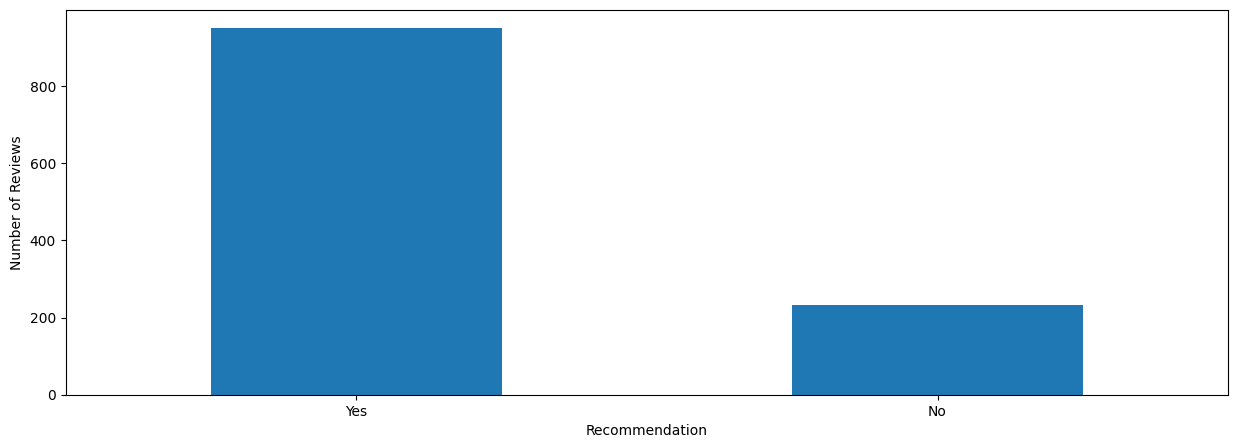

In [217]:
plt.figure(figsize=(15,5))
classification.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=0)
plt.xlabel("Recommendation")
plt.ylabel("Number of Reviews")
plt.show()

In [218]:
print(f"Percentage of positive reviews: {classification.size()['Yes']/classification.size().sum()*100:.2f}%")

Percentage of positive reviews: 80.25%


As we can see, 80.25% of the reviews recommended the movie while the rest does not recommend the movie. We can conclude that Squid Games movie is generally received well by the people.

### Wordcloud

Just finished up SQUID GAME, the Korean TV show that's become a global smash hit on Netflix. It's truly brilliant and even better than the similar Japanese show ALICE IN BORDERLAND! The show is centred around contestants competing in children's games for a cash prize, but the twist is that they get killed if they lose. Shades of SAW and THE HUNGER GAMES here, but this is rivalled only by BATTLE ROYALE in terms of sheer quality. As usual for Korea, the writing, acting, and direction are all superb and the games themselves are hugely suspenseful, unlike anything I've seen before. Definitely horrifying enough both in premise and in terms of violent bloodshed to count as horror too.
                
            
                    67 out of 144 found this helpful.
                        
                            Was this review helpful?  Sign in to vote.
                        
                        
                    Permalink


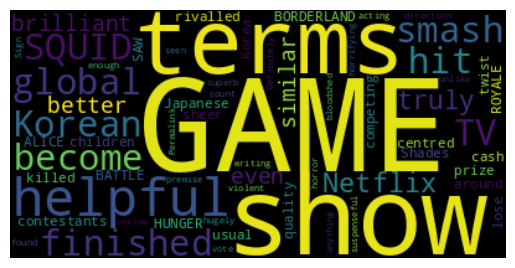

In [219]:
# Start with one review:
text = df.Review_body[0]
print(text)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# # Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

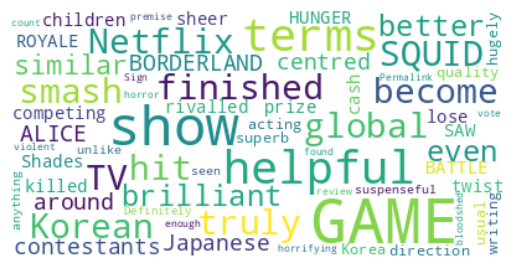

In [220]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [221]:
text = " ".join(review for review in df.Review_body)
print (f"There are {len(text)} words in the combination of all reviews.")

There are 896816 words in the combination of all reviews.


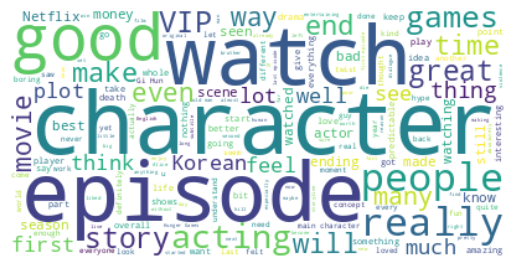

In [222]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["found", " this", "helpful", "Permalink", "this", "in", "sign", "vote", "review", "show", "squid", "game", "series", "one"])

# # Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# # Display the generated image:
# # the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Wordcloud with Images

We will use this .png image below to be used as mask.

<img src="https://github.com/riezaf51/text-visualization-assignment/blob/main/thumbs_up.png?raw=true" width=200>



In [223]:
download_image("https://raw.githubusercontent.com/riezaf51/text-visualization-assignment/main/thumbs_up.png", "thumbs_up.png")

review_mask = cv2.imread("thumbs_up.png", cv2.IMREAD_GRAYSCALE)
review_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [224]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [225]:
# Transform your mask into a new one that will work with the function:
transformed_review_mask = np.ndarray((review_mask.shape[0],review_mask.shape[1]), np.int32)

for i in range(len(review_mask)):
    transformed_review_mask[i] = list(map(transform_format, review_mask[i]))

In [226]:
transformed_review_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

Generate all reviews using the mask

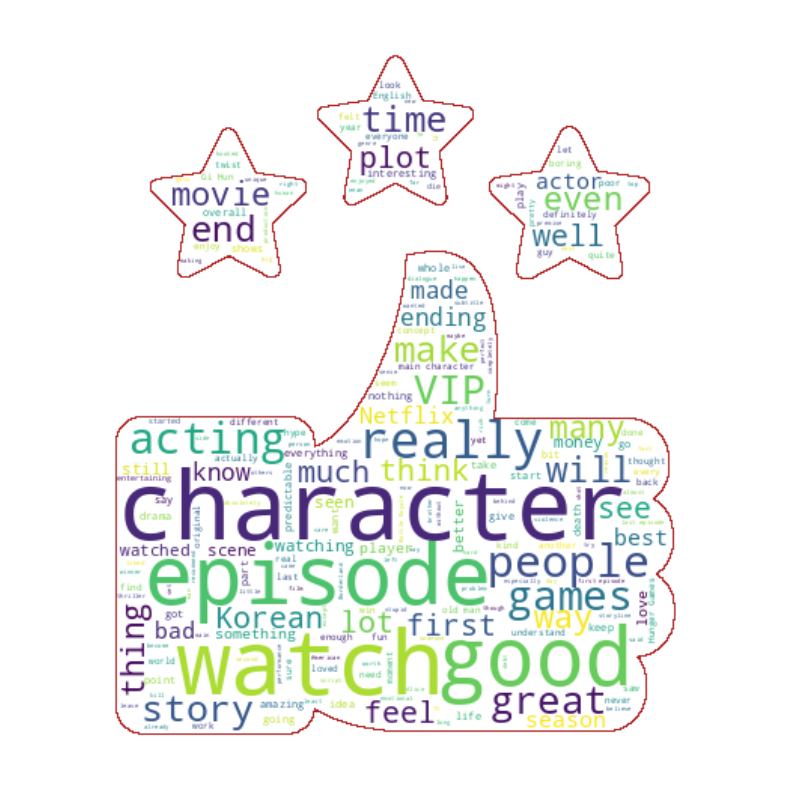

In [227]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_review_mask,
               stopwords=stopwords, contour_width=1, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("review_0.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Separate the positive and negative revies in its own variable

In [228]:
positives = " ".join(review for review in df[df['Recommend'] == 'Yes'].Review_body)
negatives = " ".join(review for review in df[df['Recommend'] == 'No'].Review_body)

Generate wordcloud for positive reviews only using the image below.

<img src="https://github.com/riezaf51/text-visualization-assignment/blob/main/green_thumbs_up.jpg?raw=true" width=200>

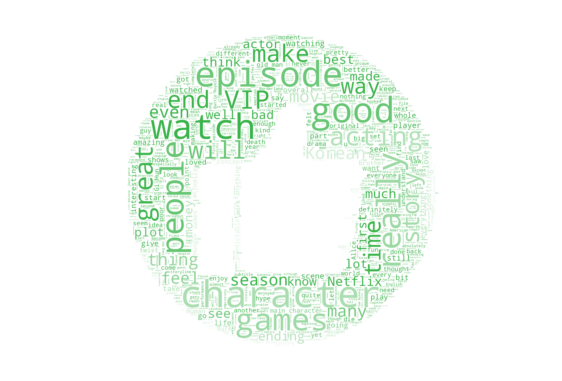

In [229]:
download_image("https://raw.githubusercontent.com/riezaf51/text-visualization-assignment/main/green_thumbs_up.jpg", "green_thumbs_up.jpg")

# Generate a word cloud image
mask = np.array(Image.open("green_thumbs_up.jpg"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(positives)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("positive_reviews.png", format="png")

plt.show()

Generate wordcloud for negative reviews only using the image below.

<img src="https://github.com/riezaf51/text-visualization-assignment/blob/main/red_thumbs_down.jpg?raw=true" width=200>

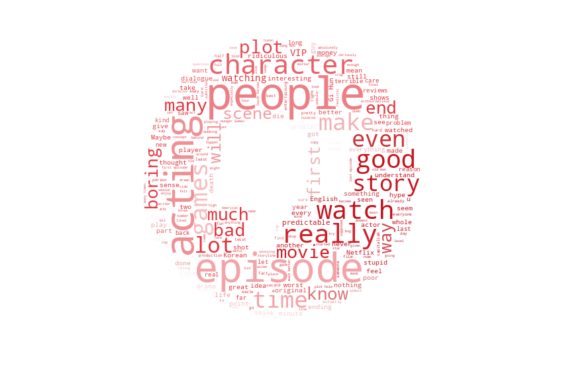

In [230]:
download_image("https://raw.githubusercontent.com/riezaf51/text-visualization-assignment/main/red_thumbs_down.jpg", "red_thumbs_down.jpg")

# Generate a word cloud image
mask = np.array(Image.open("red_thumbs_down.jpg"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(negatives)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("negative_reviews.png", format="png")

plt.show()